In [2]:
# import modules
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load data
data = pd.read_csv(os.path.join('data', 'cold.csv'))
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,ozone,co,blog,twitter,news,date
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,0.027176,0.440329,1376,4390,38,mon
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,0.030504,0.398744,2140,5754,28,wed
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,0.034050,0.389116,746,2854,40,fri
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,0.026960,0.494642,1183,4522,37,mon
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,0.039251,0.430846,1145,5686,44,mon


In [4]:
print(data.columns)

Index(['number_treatment', 'temperature', 'humidity', 'rain', 'wind',
       'sunshine', 'insolation', 'pressure', 'so2', 'fine_dust', 'no2',
       'ozone', 'co', 'blog', 'twitter', 'news', 'date'],
      dtype='object')


In [5]:
# Education: dummies
data = pd.get_dummies(data, columns=['date'], drop_first=True)

In [6]:
# target variable: price
y = data['number_treatment'].values

X = data.drop('number_treatment', axis=1)
xcolumns = X.columns.values
X = X.values

In [7]:
print('{} observations & {} variables'.format(*X.shape))

624 observations & 21 variables


In [8]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019)

In [22]:
# Grid Search
rf = RandomForestRegressor(random_state=2019)

param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 2, 4, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=2019, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
print('Best parameters (Grid Search): \n',
      rf_cv.best_params_)

Best parameters (Grid Search): 
 {'max_depth': None, 'n_estimators': 200}


In [24]:
y_pred = rf_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('[Mean Squared Error]: {:.2f}'.format(mse))
print('[R-Square          ]: {:.2f}%'.format(r2 * 100))

[Mean Squared Error]: 7491544259.68
[R-Square          ]: 79.36%


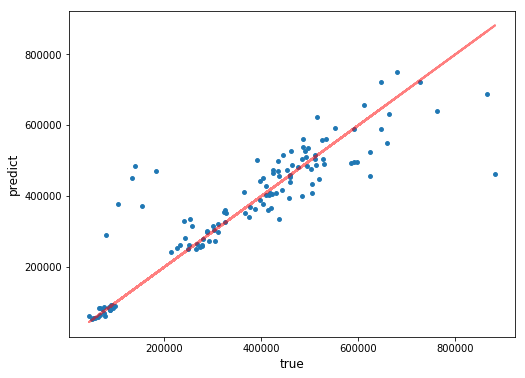

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=15)
plt.plot(y_test, y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

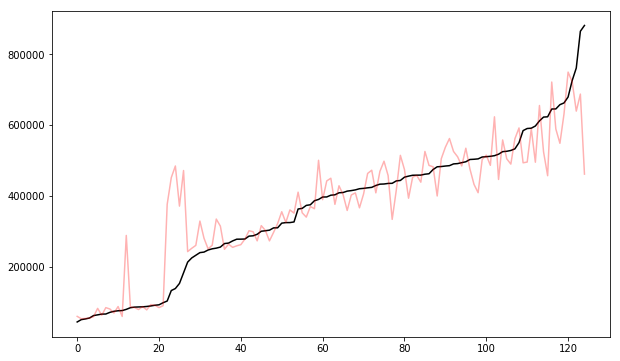

In [26]:
idx = y_test.argsort()

plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0)
plt.plot(y_pred[idx], color='red', alpha=0.3)
plt.show()

In [27]:
# Sort: descending order
importances = rf_cv.best_estimator_.feature_importances_
index = np.argsort(importances)[::-1]

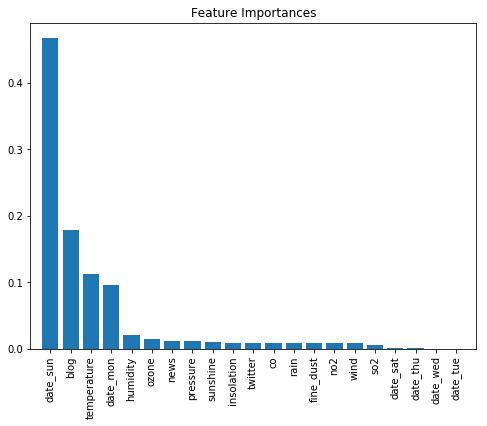

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(X.shape[1]), xcolumns[index], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [42]:
sunday_column = np.where(xcolumns == 'date_sun')[0]
sunday = (X[:, sunday_column] == 1).reshape(-1, )

In [43]:
y[sunday].mean()

77925.34065934065

In [44]:
y[~sunday].mean()

444165.51219512196